In [1]:

pip install streamlit


   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.2 MB ? eta -:--:--
   -- ------------------------------------- 0.5/10.2 MB 1.2 MB/s eta 0:00:08
   -- ------------------------------------- 0.5/10.2 MB 1.2 MB/s eta 0:00:08
   --- ------------------------------------ 0.8/10.2 MB 1.0 MB/s eta 0:00:10
   ---- ----------------------------------- 1.0/10.2 MB 1.1 MB/s eta 0:00:09
   ------ --------------------------------- 1.6/10.2 MB 1.2 MB/s eta 0:00:07
   ------- -------------------------------- 1.8/10.2 MB 1.3 MB/s eta 0:00:07
   ------- -------------------------------- 1.8/10.2 MB 1.3 MB/s eta 0:00:07
   -------- ------------------------------- 2.1/10.2 MB 1.2 MB/s eta 0:00:07
   --------- ------------------------------ 2.4/10.2 MB 1.1 MB/s eta 0:00:07
   ---------- ----------------------------- 2.6/10.2 MB 1.1 MB/s eta 0:00:07
   ---------- ----------------------------- 2.6/10.2 MB 1.1 MB/s eta 0:00:07
   ----------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import os, joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("enriched_churn_dataset.csv")
print("✅ Dataset loaded successfully")
print("Columns:", list(df.columns))
print(df.head(3))

✅ Dataset loaded successfully
Columns: ['customer_id', 'review_text', 'churn', 'age', 'gender', 'location', 'usage_frequency', 'num_purchases', 'avg_purchase_value', 'sentiment_score', 'satisfaction_score', 'num_support_tickets', 'tenure_days']
   customer_id                                        review_text  churn  age  \
0          362  Happy with the purchase. No complaints about h...      0   56   
1           74  App crashes, freezes a lot — will not buy agai...      1   46   
2          375  Battery life decent, and the OS updates still ...      0   32   

  gender   location  usage_frequency  num_purchases  avg_purchase_value  \
0      M     Mumbai                7             18                1100   
1      M    Kolkata                2             17                 264   
2      M  Hyderabad                7             19                1236   

   sentiment_score  satisfaction_score  num_support_tickets  tenure_days  
0         0.653065                 5.0                

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20976\4220623910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="churn", data=df, palette="coolwarm")


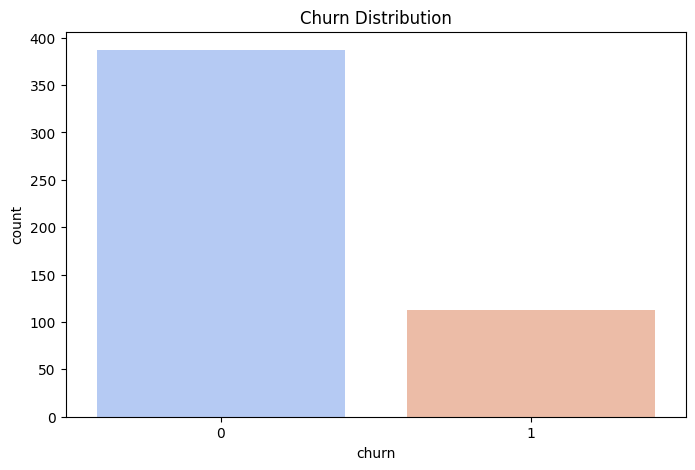

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(x="churn", data=df, palette="coolwarm")
plt.title("Churn Distribution")
plt.show()

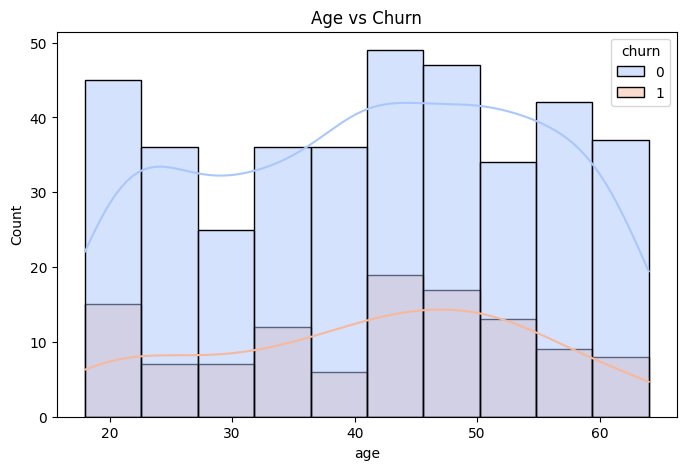

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="age", hue="churn", kde=True, palette="coolwarm")
plt.title("Age vs Churn")
plt.show()

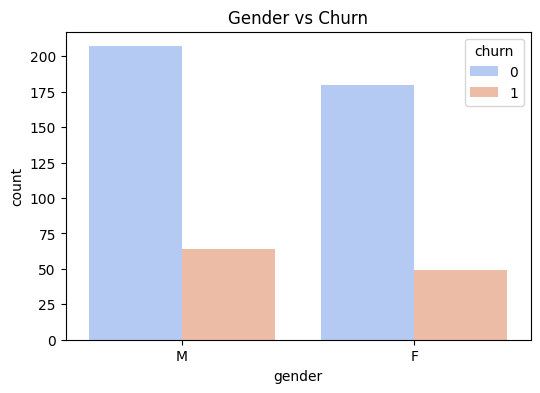

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x="gender", hue="churn", data=df, palette="coolwarm")
plt.title("Gender vs Churn")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20976\3354774541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn", y="satisfaction_score", data=df, palette="coolwarm")


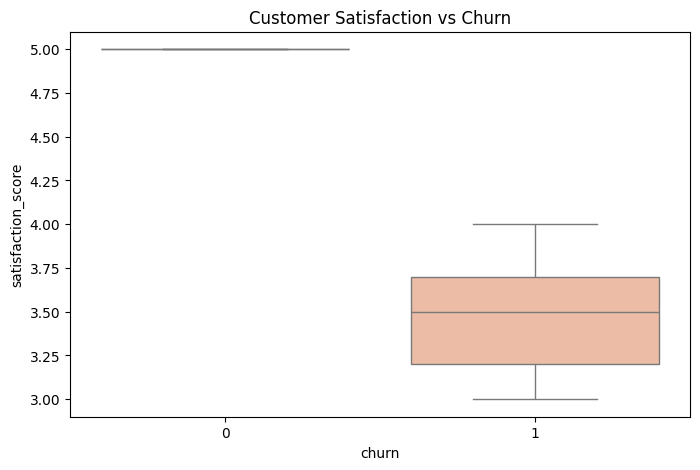

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot(x="churn", y="satisfaction_score", data=df, palette="coolwarm")
plt.title("Customer Satisfaction vs Churn")
plt.show()

In [29]:
text_features = df['review_text']
y = df['churn']

num_features = [
    'age', 'usage_frequency', 'num_purchases',
    'avg_purchase_value', 'sentiment_score',
    'satisfaction_score', 'num_support_tickets', 'tenure_days'
]

X_num = df[num_features]
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X_text_vec = vectorizer.fit_transform(text_features)

# Combine text + numeric features
X_combined = hstack([X_text_vec, X_num_scaled])

X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, stratify=y, random_state=42
)

In [30]:
model = LogisticRegression(max_iter=1500, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1500
,multi_class,'deprecated'



📈 Model Evaluation
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        23

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix:
 [[77  0]
 [ 0 23]]


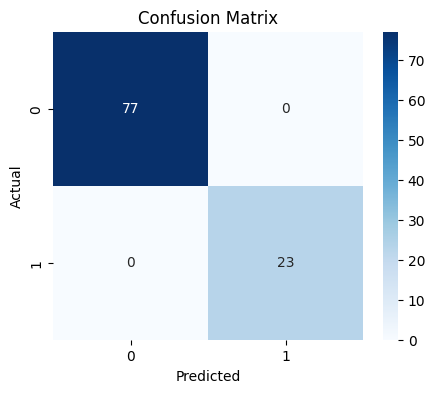

In [31]:
y_pred = model.predict(X_test)

print("\n📈 Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix Plot
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:
os.makedirs('model_artifacts', exist_ok=True)
joblib.dump(model, 'model_artifacts/enriched_churn_model.pkl')
joblib.dump(vectorizer, 'model_artifacts/tfidf_vectorizer.pkl')
joblib.dump(scaler, 'model_artifacts/scaler.pkl')
print("\n💾 Model, vectorizer, and scaler saved successfully.")


💾 Model, vectorizer, and scaler saved successfully.


In [33]:
def predict_churn(review_text, numeric_data):
    """
    numeric_data: dict with numeric feature values
    """
    model = joblib.load('model_artifacts/enriched_churn_model.pkl')
    vec = joblib.load('model_artifacts/tfidf_vectorizer.pkl')
    scaler = joblib.load('model_artifacts/scaler.pkl')

    X_text = vec.transform([review_text])
    X_num = np.array([[numeric_data[k] for k in numeric_data.keys()]])
    X_num_scaled = scaler.transform(X_num)
    
    X_final = hstack([X_text, X_num_scaled])
    return model.predict(X_final)[0]

In [34]:
# Example
sample_review = "Battery drains quickly and it heats up often."
sample_numeric = {
    "age": 30,
    "usage_frequency": 4,
    "num_purchases": 10,
    "avg_purchase_value": 1000,
    "sentiment_score": -0.6,
    "satisfaction_score": 2.5,
    "num_support_tickets": 2,
    "tenure_days": 220
}

prediction = predict_churn(sample_review, sample_numeric)
print(f"\n🧠 Sample Review: {sample_review}")
print("Predicted Churn:", "Yes" if prediction == 1 else "No")


🧠 Sample Review: Battery drains quickly and it heats up often.
Predicted Churn: Yes


c:\Users\ASUS\OneDrive\Desktop\New folder (2)\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


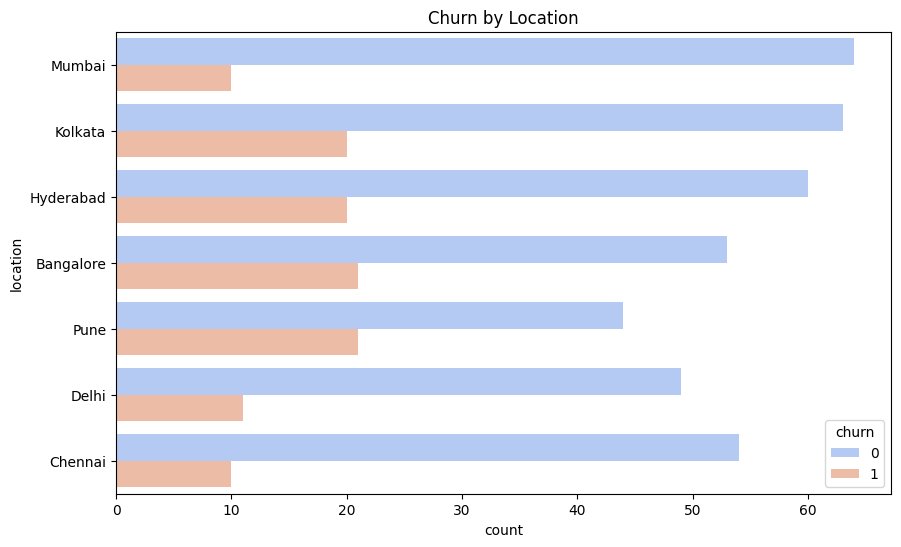

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20976\4150550213.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="churn", y="sentiment_score", data=df, palette="coolwarm")


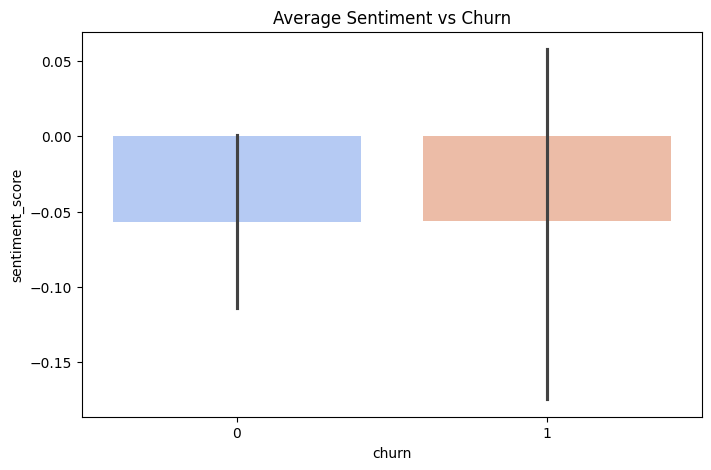

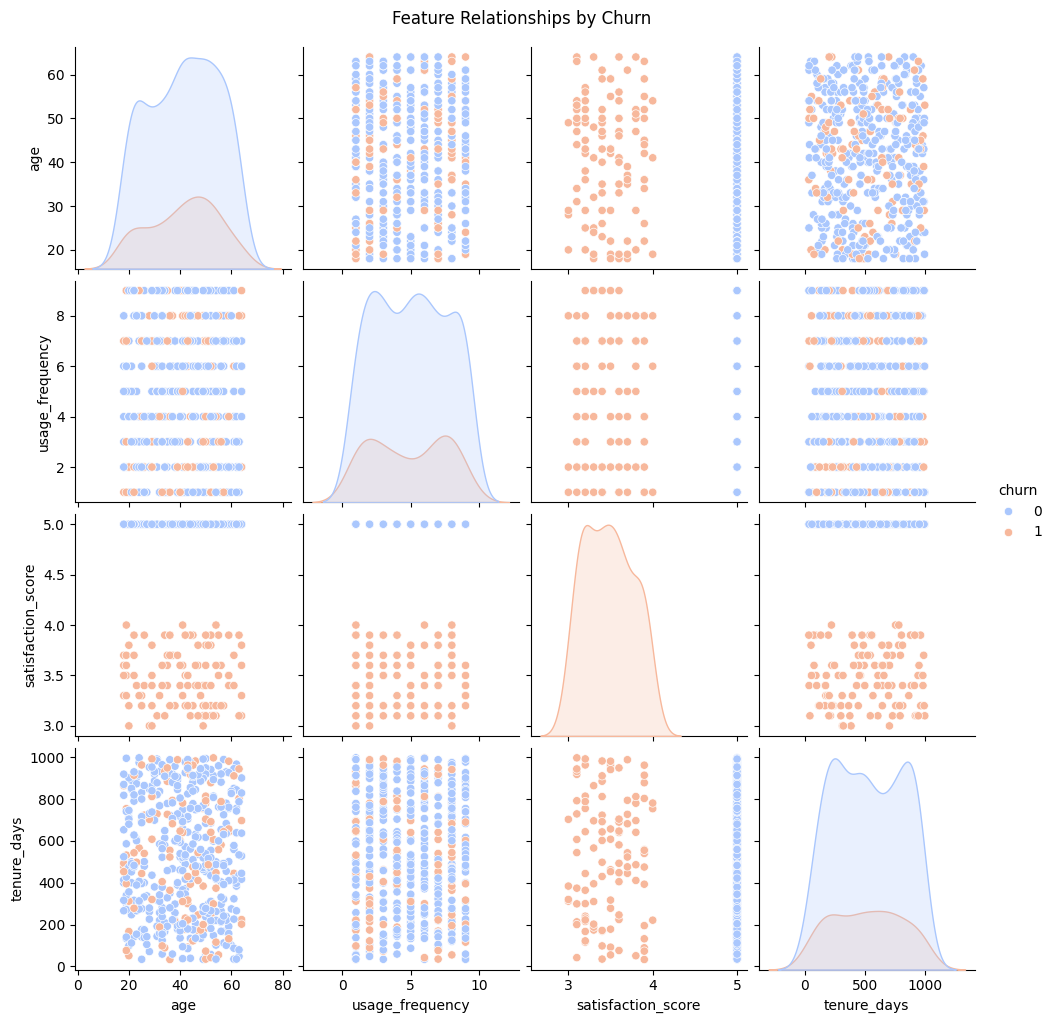

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(y="location", hue="churn", data=df, palette="coolwarm")
plt.title("Churn by Location")
plt.show()

# Average Sentiment vs Churn
plt.figure(figsize=(8,5))
sns.barplot(x="churn", y="sentiment_score", data=df, palette="coolwarm")
plt.title("Average Sentiment vs Churn")
plt.show()

# Pairplot for Numeric Features
sns.pairplot(df, vars=['age','usage_frequency','satisfaction_score','tenure_days'], hue='churn', palette="coolwarm")
plt.suptitle("Feature Relationships by Churn", y=1.02)
plt.show()